In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import pandas as pd

In [7]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import string

In [15]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin
from tqdm import tqdm
import json
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np
import re

In [22]:
#retrieving all listed world entities
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import string
import time
import requests
from lxml import html
from bs4 import BeautifulSoup
from tqdm import tqdm
import json
import pandas as pd
import re

In [133]:
from tqdm import tqdm
import time  # Import time to simulate scraping time

In [9]:
file_path = '/Users/apoorvashete/Desktop/STA220FinalProject-Yelp/restaurants_data/Reviews_Popular_restaurants.csv'
df = pd.read_csv(file_path)
df

,business_id,user_id,name,timestamp,rating,text
0,SP4bvMvxel_UPdof_er3HA,-_RukL65tHq7m89swcdLTQ,Richard H.,2024-01-20 11:34:26,5,"Super fusion of India and Mexico. Friendly, qu..."
1,SP4bvMvxel_UPdof_er3HA,gEuaZkpeOkg5eQibMeDi2A,Jose P.,2024-03-03 16:21:10,5,Taco Mahal was a very unique experience. I've ...
2,SP4bvMvxel_UPdof_er3HA,yn2jElvZdrJtAg_bIDAGtw,Rehnuma K.,2024-02-19 17:08:16,5,1/1 Ambience; 1.5/2 Food + Beverages; 1/1 Serv...
3,16ZnHpuaaBt92XWeJHCC5A,Uf-wTpxNV8HX9QU18BiO_w,Katia K.,2024-02-14 17:54:41,5,The food is super delicious! Definitely my new...
4,16ZnHpuaaBt92XWeJHCC5A,aRjF2KOPXOibQ8j9h1vz1w,diana a.,2024-02-23 13:22:00,5,The food is good. If you're the kind of foodie...
...,...,...,...,...,...,...
760,QXOIJVTUcXPN_2LOvevSxg,LDjX_zpCzY57Euob1RVipg,Kristina W.,2024-02-18 05:10:34,5,Our 1st choice for good food AND boba. Prices ...
761,QXOIJVTUcXPN_2LOvevSxg,SBgxcln8Q_u26LqX_Z4ONA,Eliza R.,2024-02-08 08:41:15,5,We've loved Bethany's for years! Love that the...
762,P0VziPp_DuKBol_YNKLqSw,pVQ5hn7U4U2zmyHJY__cPQ,Eric A.,2024-01-29 15:45:42,5,Excellent food atmosphere and experience would...
763,P0VziPp_DuKBol_YNKLqSw,VVVAobfACVVyYHfdImnBSQ,Nuzhat B.,2024-01-25 09:42:39,5,Tiny restaurant in a mixed neighborhood of Irv...


Using natural language processing (NLP) techniques to extract topics or keywords from the review text, revealing common discussion points. Look for recurring mentions of specific dishes, services, or features to understand what customers appreciate or dislike about each restaurant.

In [10]:
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/apoorvashete/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/apoorvashete/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
def preprocess_text(text):

    text = text.lower()
    #remove punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))
    #tokenize text
    words = nltk.word_tokenize(text)
    #remove stop words and apply lemmatization & stemming
    words = [lemmatizer.lemmatize(word) for word in words if word.isalnum() and word not in stop_words]
    words = [stemmer.stem(word) for word in words]
    
    return ' '.join(words)

In [12]:
df['processed_text'] = df['text'].apply(preprocess_text)

In [14]:
#creating a tf-idf matrix
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_text'])

Applying Latent Dirichlet Allocation (LDA) for topic modeling 

In [16]:
num_topics = 5 #looking for the top 5 topics of dicussion in the reviews
topic_names = ["good food", "service quality", "ambience", "value for money", "overall experience"]
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_matrix = lda.fit_transform(tfidf_matrix)

#displaying the top 10 words for each topic
feature_names = tfidf_vectorizer.get_feature_names_out()
num_top_words = 10

for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-num_top_words - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    topic_name = topic_names[topic_idx]
    print(f"{topic_name}: {', '.join(top_words)}")

good food: food, great, servic, best, amaz, realli, everyth, good, im, delici
service quality: food, good, great, servic, place, friend, love, order, restaur, server
ambience: time, came, place, happi, servic, dinner, food, good, taco, realli
value for money: food, great, servic, restaur, night, recommend, amaz, place, went, alway
overall experience: place, food, restaur, time, servic, good, love, wait, thing, order


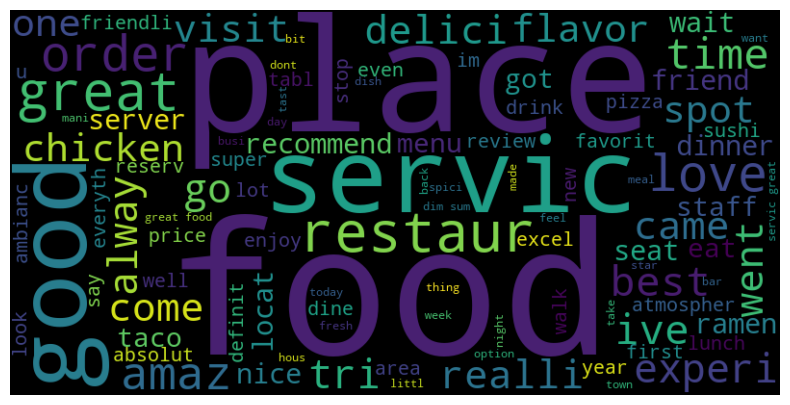

In [17]:
#create a word cloud for visualization
all_words = ' '.join(df['processed_text'])
wordcloud = WordCloud(width=800, height=400, random_state=42, max_words=100).generate(all_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [10]:
file_path = '/Users/apoorvashete/Desktop/STA220FinalProject-Yelp/restaurants_data/popular_restaurants.csv'
popular_restaurants_df = pd.read_csv(file_path)
popular_restaurants_df

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,SP4bvMvxel_UPdof_er3HA,taco-mahal-new-york,Taco Mahal,https://s3-media2.fl.yelpcdn.com/bphoto/wo7f5l...,False,https://www.yelp.com/biz/taco-mahal-new-york?a...,886,"[{'alias': 'indpak', 'title': 'Indian'}, {'ali...",4.4,"{'latitude': 40.73235768476899, 'longitude': -...","['delivery', 'pickup']",$$,"{'address1': '73 7th Ave S', 'address2': '', '...",16467191553,(646) 719-1553,3077.683720
1,16ZnHpuaaBt92XWeJHCC5A,olio-e-più-new-york-7,Olio e Più,https://s3-media4.fl.yelpcdn.com/bphoto/CUpPgz...,False,https://www.yelp.com/biz/olio-e-pi%C3%B9-new-y...,5393,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...",4.5,"{'latitude': 40.733798036104304, 'longitude': ...","['delivery', 'pickup']",$$,"{'address1': '3 Greenwich Ave', 'address2': No...",12122436546,(212) 243-6546,3175.697940
2,NOh24SMS6k4pzNv8Ds7KDg,cafe-habana-new-york-4,Cafe Habana,https://s3-media3.fl.yelpcdn.com/bphoto/cUHxmL...,False,https://www.yelp.com/biz/cafe-habana-new-york-...,3311,"[{'alias': 'cuban', 'title': 'Cuban'}, {'alias...",4.0,"{'latitude': 40.72293, 'longitude': -73.99419}","['pickup', 'delivery']",$$,"{'address1': '17 Prince St', 'address2': '', '...",12126252001,(212) 625-2001,1933.430593
3,0CjK3esfpFcxIopebzjFxA,joes-shanghai-new-york-2,Joe's Shanghai,https://s3-media2.fl.yelpcdn.com/bphoto/ORdfWy...,False,https://www.yelp.com/biz/joes-shanghai-new-yor...,7327,"[{'alias': 'shanghainese', 'title': 'Shanghain...",3.8,"{'latitude': 40.7156608, 'longitude': -73.9967...","['pickup', 'delivery']",$$,"{'address1': '46 Bowery St', 'address2': '', '...",12122338888,(212) 233-8888,1143.405792
4,FlZ1zdVEKWv7dwqm8Uw8-w,raku-new-york-7,Raku,https://s3-media4.fl.yelpcdn.com/bphoto/GEbZnH...,False,https://www.yelp.com/biz/raku-new-york-7?adjus...,1635,"[{'alias': 'japanese', 'title': 'Japanese'}, {...",4.5,"{'latitude': 40.7264988089246, 'longitude': -7...","['pickup', 'delivery']",$$,"{'address1': '342 E 6th St', 'address2': '', '...",12122281324,(212) 228-1324,2416.602715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,NL2gOp0p7D3_YNI3eZfbPw,india-grill-arlington-2,India Grill,https://s3-media3.fl.yelpcdn.com/bphoto/4pRlXd...,False,https://www.yelp.com/biz/india-grill-arlington...,622,"[{'alias': 'indpak', 'title': 'Indian'}]",4.2,"{'latitude': 32.68123, 'longitude': -97.11371}","['pickup', 'delivery']",$$,"{'address1': '3900 Chaney Dr', 'address2': 'St...",18174689150,(817) 468-9150,3294.696270
251,v6xe2MRwStuwxPH2SH89ag,italian-cafe-irving,Italian Cafe,https://s3-media2.fl.yelpcdn.com/bphoto/c9_hmX...,False,https://www.yelp.com/biz/italian-cafe-irving?a...,470,"[{'alias': 'italian', 'title': 'Italian'}]",3.9,"{'latitude': 32.865059007048, 'longitude': -96...","['pickup', 'delivery']",$$,"{'address1': '387 E Las Colinas Blvd', 'addres...",19724010216,(972) 401-0216,24275.084419
252,QtCs9kugi0cs4x_O1QDaPg,hugos-invitados-irving,Hugo's Invitados,https://s3-media1.fl.yelpcdn.com/bphoto/uRsSLs...,False,https://www.yelp.com/biz/hugos-invitados-irvin...,929,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...",4.3,"{'latitude': 32.869753, 'longitude': -96.937645}","['pickup', 'delivery']",$$$,"{'address1': ""5240 N O'Connor Blvd"", 'address2...",12144960590,(214) 496-0590,24574.172420
253,QXOIJVTUcXPN_2LOvevSxg,bethany-boba-tea-and-cafe-arlington,Bethany Boba Tea & Cafe,https://s3-media1.fl.yelpcdn.com/bphoto/Rpip7o...,False,https://www.yelp.com/biz/bethany-boba-tea-and-...,719,"[{'alias': 'chinese', 'title': 'Chinese'}, {'a...",3.9,"{'latitude': 32.7213249, 'longitude': -97.1155...",['delivery'],$,"{'address1': '705 W Park Row Dr', 'address2': ...",18174611245,(817) 461-1245,1330.808818


In [11]:
#extracting links of all restaurants
restaurant_urls = popular_restaurants_df['url'].tolist()
restaurant_urls

['https://www.yelp.com/biz/taco-mahal-new-york?adjust_creative=mUhtpg0LANTRd76OAeN1RQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=mUhtpg0LANTRd76OAeN1RQ',
 'https://www.yelp.com/biz/olio-e-pi%C3%B9-new-york-7?adjust_creative=mUhtpg0LANTRd76OAeN1RQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=mUhtpg0LANTRd76OAeN1RQ',
 'https://www.yelp.com/biz/cafe-habana-new-york-4?adjust_creative=mUhtpg0LANTRd76OAeN1RQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=mUhtpg0LANTRd76OAeN1RQ',
 'https://www.yelp.com/biz/joes-shanghai-new-york-2?adjust_creative=mUhtpg0LANTRd76OAeN1RQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=mUhtpg0LANTRd76OAeN1RQ',
 'https://www.yelp.com/biz/raku-new-york-7?adjust_creative=mUhtpg0LANTRd76OAeN1RQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=mUhtpg0LANTRd76OAeN1RQ',
 'https://www.yelp.com/biz/himalayan-yak-jackson-heights?adjust_creative=mUhtpg0LANT

In [25]:
# # button for going to the next page
# #navigation-button-container__09f24__SvcBh css-1qn0b6x--> next page button class 
# try:
#     button = WebDriverWait(driver, 10).until(
#         EC.presence_of_element_located((By.XPATH, "/html/body/yelp-react-root/div[1]/div[6]/div/div[1]/div[1]/main/div[3]/div/section/div[2]/div[5]/div[1]/div/div[11]"))
#     )
#     button.click()
# except TimeoutException:
#     print("Timed out waiting for the button to be present.")

In [ ]:
#trying for one list element
# #in each li class fetch necessary items
# li = li_class[2]

# #date
# date_span = li.find('span', class_='css-chan6m')
# if date_span:
#         date_text = date_span.text.strip()
#         print("Date:", date_text)

# #review text
# review_text_span = li.find('span', class_= 'raw__09f24__T4Ezm')
# if review_text_span:
#         review_text = review_text_span.text.strip()
#         print("review Text:", review_text)

# #rating
# rating_div = li.find('div', class_= 'css-14g69b3')
# if rating_div:
#         rating = rating_div.get('aria-label')
#         print("Rating:", rating)

In [134]:
# #extracting the text from page 1
# #to do: same for the next 8 pages; total 9 pages 
# response = requests.get(url)
# soup = BeautifulSoup(response.text, 'html.parser')
# #fetch all li class
# li_class = soup.find_all('li', class_= 'css-1q2nwpv')
# li_class
# for li in li_class:
#     #date
#         date_span = li.find('span', class_='css-chan6m')
#         if date_span:
#                 date_text = date_span.text.strip()
#                 # print("Date:", date_text)

#         #review text
#         review_text_span = li.find('span', class_= 'raw__09f24__T4Ezm')
#         if review_text_span:
#                 review_text = review_text_span.text.strip()
#                 # print("review Text:", review_text)

#         #rating
#         rating_div = li.find('div', class_= 'css-14g69b3')
#         if rating_div:
#                 rating = rating_div.get('aria-label')
#                 # print("Rating:", rating)
        
#         if rating and review_text and date_text:
#                 result.append({
#             'Date': date_text,
#             'Review Text': review_text,
#             'Rating': rating
#         })
# print(result)

In [119]:
# Function to scrape data from a given page URL
def scrape_page(url):
    result = []

    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    li_class = soup.find_all('li', class_='css-1q2nwpv')

    for li in li_class:
        # Initialize variables
        date_text = ''
        review_text = ''
        rating = ''
        
        # Date
        date_span = li.find('span', class_='css-chan6m')
        if date_span:
            date_text = date_span.text.strip()

        # Review text
        review_text_span = li.find('span', class_='raw__09f24__T4Ezm')
        if review_text_span:
            review_text = review_text_span.text.strip()

        # Rating
        rating_div = li.find('div', class_='css-14g69b3')
        if rating_div:
            rating = rating_div.get('aria-label')

        # Check if all three elements are found before appending to the result list
        if date_text and review_text and rating:
            result.append({
                'Date': date_text,
                'Review Text': review_text,
                'Rating': rating
            })

    return result

In [115]:
# Function to navigate to the next page
def navigate_to_next_page(driver):
    # button for going to the next page
    #navigation-button-container__09f24__SvcBh css-1qn0b6x--> next page button class 
    try:
        button = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.XPATH, "/html/body/yelp-react-root/div[1]/div[6]/div/div[1]/div[1]/main/div[3]/div/section/div[2]/div[5]/div[1]/div/div[11]"))
        )
        button.click()
    except TimeoutException:
        print("Timed out waiting for the button to be present.")

In [145]:
#start a web driver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

KeyboardInterrupt: 

In [139]:
#trying fucntions for the first link
# Main code
url= restaurant_urls[0] # Replace with your actual base URL
num_pages = 5
result_for_link_1 = []

#initialise the driver
driver.set_page_load_timeout(20)
try:
    driver.get(url)
except TimeoutException:
    driver.execute_script("window.stop();")

for page_number in range(1, 10):
    scrape_result = scrape_page(url)
    print(f"Scraped data from page {page_number}")
    result_for_link_1.extend(scrape_result)
    # Navigate to the next page
    navigate_to_next_page(driver)
    url = driver.current_url

WebDriverException: Message: disconnected: not connected to DevTools
  (failed to check if window was closed: disconnected: not connected to DevTools)
  (Session info: chrome=122.0.6261.112)
Stacktrace:
0   chromedriver                        0x0000000102cdc508 chromedriver + 3966216
1   chromedriver                        0x0000000102cd4a94 chromedriver + 3934868
2   chromedriver                        0x0000000102957da0 chromedriver + 277920
3   chromedriver                        0x0000000102940c74 chromedriver + 183412
4   chromedriver                        0x0000000102940ba0 chromedriver + 183200
5   chromedriver                        0x00000001029d2320 chromedriver + 779040
6   chromedriver                        0x000000010298efb0 chromedriver + 503728
7   chromedriver                        0x000000010298fa28 chromedriver + 506408
8   chromedriver                        0x0000000102ca16f0 chromedriver + 3725040
9   chromedriver                        0x0000000102ca5be4 chromedriver + 3742692
10  chromedriver                        0x0000000102c8a1d8 chromedriver + 3629528
11  chromedriver                        0x0000000102ca66e0 chromedriver + 3745504
12  chromedriver                        0x0000000102c7d550 chromedriver + 3577168
13  chromedriver                        0x0000000102cc4f40 chromedriver + 3870528
14  chromedriver                        0x0000000102cc50e4 chromedriver + 3870948
15  chromedriver                        0x0000000102cd4704 chromedriver + 3933956
16  libsystem_pthread.dylib             0x00000001894a3fa8 _pthread_start + 148
17  libsystem_pthread.dylib             0x000000018949eda0 thread_start + 8


In [138]:
# Loop through each restaurant URL
all_data = []
for url in tqdm(restaurant_urls, desc="Scraping Restaurants"):
    num_pages = 5

    # Initialize the driver
    driver.set_page_load_timeout(20)
    try:
        driver.get(url)
    except TimeoutException:
        driver.execute_script("window.stop();")

    # Loop through each page for the current restaurant URL
    for page_number in range(1, num_pages + 1):
        scrape_result = scrape_page(url)
        print(f"Scraped data from page {page_number}")
        time.sleep(1)  # Simulate scraping time
        all_data.extend(scrape_result)

        # Navigate to the next page
        navigate_to_next_page(driver)
        url = driver.current_url

    print(f"\nResults fetched for URL {url}:")

Scraping Restaurants:   0%|          | 0/255 [00:00<?, ?it/s]

Scraped data from page 1
Scraped data from page 2
Scraped data from page 3
Scraped data from page 4
Scraped data from page 5
Scraped data from page 6
Scraped data from page 7
Scraped data from page 8
Scraped data from page 9


Scraping Restaurants:   0%|          | 1/255 [00:45<3:11:22, 45.21s/it]


Results fetched for URL https://www.yelp.com/biz/taco-mahal-new-york?adjust_creative=mUhtpg0LANTRd76OAeN1RQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=mUhtpg0LANTRd76OAeN1RQ&start=80:
Scraped data from page 1
Scraped data from page 2
Scraped data from page 3
Scraped data from page 4
Scraped data from page 5
Scraped data from page 6
Scraped data from page 7
Scraped data from page 8
Scraped data from page 9


Scraping Restaurants:   1%|          | 2/255 [01:27<3:02:22, 43.25s/it]


Results fetched for URL https://www.yelp.com/biz/olio-e-pi%C3%B9-new-york-7?adjust_creative=mUhtpg0LANTRd76OAeN1RQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=mUhtpg0LANTRd76OAeN1RQ&start=80:
Scraped data from page 1
Scraped data from page 2
Scraped data from page 3
Scraped data from page 4
Scraped data from page 5
Scraped data from page 6
Scraped data from page 7
Scraped data from page 8
Scraped data from page 9


Scraping Restaurants:   1%|          | 3/255 [02:12<3:06:28, 44.40s/it]


Results fetched for URL https://www.yelp.com/biz/cafe-habana-new-york-4?adjust_creative=mUhtpg0LANTRd76OAeN1RQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=mUhtpg0LANTRd76OAeN1RQ&start=80:
Scraped data from page 1
Scraped data from page 2
Scraped data from page 3
Scraped data from page 4
Scraped data from page 5
Scraped data from page 6
Scraped data from page 7
Scraped data from page 8
Scraped data from page 9


Scraping Restaurants:   2%|▏         | 4/255 [03:00<3:10:42, 45.59s/it]


Results fetched for URL https://www.yelp.com/biz/joes-shanghai-new-york-2?adjust_creative=mUhtpg0LANTRd76OAeN1RQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=mUhtpg0LANTRd76OAeN1RQ&start=80:
Scraped data from page 1
Scraped data from page 2
Scraped data from page 3
Scraped data from page 4
Scraped data from page 5
Scraped data from page 6
Scraped data from page 7
Scraped data from page 8
Scraped data from page 9


Scraping Restaurants:   2%|▏         | 5/255 [03:44<3:07:51, 45.09s/it]


Results fetched for URL https://www.yelp.com/biz/raku-new-york-7?adjust_creative=mUhtpg0LANTRd76OAeN1RQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=mUhtpg0LANTRd76OAeN1RQ&start=80:
Scraped data from page 1
Scraped data from page 2
Scraped data from page 3
Scraped data from page 4
Scraped data from page 5
Scraped data from page 6
Scraped data from page 7
Scraped data from page 8
Scraped data from page 9


Scraping Restaurants:   2%|▏         | 6/255 [04:32<3:11:20, 46.11s/it]


Results fetched for URL https://www.yelp.com/biz/himalayan-yak-jackson-heights?adjust_creative=mUhtpg0LANTRd76OAeN1RQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=mUhtpg0LANTRd76OAeN1RQ&start=80:
Scraped data from page 1
Scraped data from page 2
Scraped data from page 3
Scraped data from page 4
Scraped data from page 5
Scraped data from page 6
Scraped data from page 7
Scraped data from page 8
Scraped data from page 9


Scraping Restaurants:   3%|▎         | 7/255 [05:22<3:15:53, 47.39s/it]


Results fetched for URL https://www.yelp.com/biz/trattoria-l-incontro-astoria-6?adjust_creative=mUhtpg0LANTRd76OAeN1RQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=mUhtpg0LANTRd76OAeN1RQ&start=80:
Scraped data from page 1
Scraped data from page 2


Scraping Restaurants:   3%|▎         | 7/255 [05:36<3:18:57, 48.13s/it]


WebDriverException: Message: disconnected: not connected to DevTools
  (failed to check if window was closed: disconnected: not connected to DevTools)
  (Session info: chrome=122.0.6261.112)
Stacktrace:
0   chromedriver                        0x0000000102cdc508 chromedriver + 3966216
1   chromedriver                        0x0000000102cd4a94 chromedriver + 3934868
2   chromedriver                        0x0000000102957da0 chromedriver + 277920
3   chromedriver                        0x0000000102940c74 chromedriver + 183412
4   chromedriver                        0x0000000102940ba0 chromedriver + 183200
5   chromedriver                        0x00000001029d2320 chromedriver + 779040
6   chromedriver                        0x000000010298efb0 chromedriver + 503728
7   chromedriver                        0x000000010298fa28 chromedriver + 506408
8   chromedriver                        0x0000000102ca16f0 chromedriver + 3725040
9   chromedriver                        0x0000000102ca5be4 chromedriver + 3742692
10  chromedriver                        0x0000000102c8a1d8 chromedriver + 3629528
11  chromedriver                        0x0000000102ca66e0 chromedriver + 3745504
12  chromedriver                        0x0000000102c7d550 chromedriver + 3577168
13  chromedriver                        0x0000000102cc4f40 chromedriver + 3870528
14  chromedriver                        0x0000000102cc50e4 chromedriver + 3870948
15  chromedriver                        0x0000000102cd4704 chromedriver + 3933956
16  libsystem_pthread.dylib             0x00000001894a3fa8 _pthread_start + 148
17  libsystem_pthread.dylib             0x000000018949eda0 thread_start + 8
